In [1]:
#!pip install -U albumentations

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.6.0 requires gin-config, which is not installed.
tf-models-official 2.6.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.6.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.6.0 requires oauth2client, which is not installed.
tf-models-official 2.6.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.6.0 requires pycocotools, which is not installed.
tf-models-official 2.6.0 requires sacrebleu, which is not installed.
tf-models-official 2.6.0 requires sentencepiece, which is not installed.
tf-models-official 2.6.0 requires seqeval, which is not installed.
tf-models-official 2.6.0 requires tensorflow-addons, which is not installed.
tf-models-official 2.6.0 requires tensorflow-datasets, which is not installed.
tf-mod

In [55]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import random
import os

In [2]:
def visualize(image):
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(image)

In [3]:
transform = A.Compose([
    A.ShiftScaleRotate(rotate_limit=(0,270), p=0.9), 
    A.RandomBrightnessContrast(p=0.7), 
    A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.7)
], bbox_params=A.BboxParams(format='yolo'))

In [7]:
image = cv2.imread('1 (2).jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
with open('1 (2).txt', 'r') as f:
    lines = [line.strip() for line in f.readlines()]
label = [float(i) for i in lines[0].split(' ')]
obj_class = label.pop(0)
label.append(str(obj_class))
label = [label]

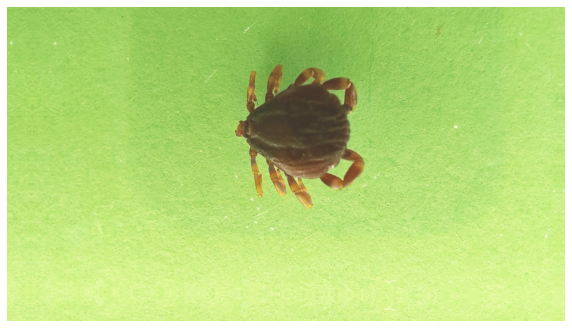

In [9]:
transformed = transform(image=image, bboxes=label)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
visualize(transformed_image)

# Code for augmentation

In [82]:
def augumentation(image, bbox_list):
    object_list = []
    for bbox in bbox_list:
        label = [float(i) for i in bbox.split(' ')]
        obj_class = label.pop(0)
        label.append(str(obj_class))
        object_list.append(label)
    
    if float(object_list[0][4]) not in [0, 1.0, 2.0, 3.0]:    
        transformed = transform(image=image, bboxes=object_list)
        transformed_image = transformed['image']
        transformed_bboxes = transformed['bboxes']
    
        transformed_bbox_list = []
        for i in transformed_bboxes:
            i = list(i)
            obj_class = i.pop(4)
            i.insert(0, float(obj_class))
            transformed_bbox_list.append(i)
           
        return transformed_image, transformed_bbox_list
    else:
        return None

In [52]:
with open('1 (2).txt', 'r') as f:
    lines = [line.strip() for line in f.readlines()]

In [53]:
a = augumentation(image, lines)

In [70]:
image_path = r'C:\Users\dariu\Jupyter_Notebook\CONVERT\Data Augmentation\YOLO_full_new_tick_data\images\train'
label_path = r'C:\Users\dariu\Jupyter_Notebook\CONVERT\Data Augmentation\YOLO_full_new_tick_data\labels\train'

image_list = []
label_list = []
for image_name in os.listdir(image_path):
    image = cv2.imread(image_path+'\\'+image_name)
    image_list.append(image)

for file in os.listdir(label_path):
    with open(label_path+'\\'+file, 'r') as f:
        lines = [line.strip() for line in f.readlines()]
        label_list.append(lines)

In [110]:
aug_data_path = "C:\\Users\\dariu\\Jupyter_Notebook\\CONVERT\\Data Augmentation\\augmented_data\\"

for i in range(len(image_list)):
    augmented_data = augumentation(image_list[i], label_list[i])
    
    if augmented_data==None:
            continue
    else:
        image = augmented_data[0]
        bbox = augmented_data[1]
        
        cv2.imwrite(aug_data_path+f"aug_{i}.jpg", image)
        with open(aug_data_path+f"aug_{i}.txt", 'w') as f:
            for obj in bbox:
                f.write(f'{obj[0]} {obj[1]} {obj[2]} {obj[3]} {obj[4]}')